In [23]:
# Importing necessacry libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime  

In [24]:
# Loading the dataset
df = pd.read_csv('climate_action_data.csv')

df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [25]:
# Data description
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2025-04-22,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [26]:
# Check for missing values
print('Missing values')
df.isnull().sum()

Missing values


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [27]:
# Dealing with missing values
# Using mode to fill in missing values for Crop Type
numeric_cols = ['Crop_Type']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
# Check for missing values
print('Missing values')
df.isnull().sum()

Missing values


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [28]:
# Using interpolate to fill in missing date values
# Converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filling in missing values
df['Date'] = df['Date'].interpolate(method='linear')

# Check for missing values
print('Missing values')
df.isnull().sum()

Missing values


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [ ]:
# Dealing with wrong data formats 
# Converting 'Soil Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)' to numeric
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors = 'coerce')
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors = 'coerce')
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors = 'coerce') 
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors = 'coerce')
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors = 'coerce')
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors = 'coerce')

# Print datatypes
df.dtypes

Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object

In [30]:
# Check for missing values
print('Missing values')
df.isnull().sum()

Missing values


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [31]:
# Filling in missing values for numeric columns with median
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
        
# Check for missing values
print('Missing values')
df.isnull().sum()

Missing values


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [32]:
# Checking for duplicates
print('Number of duplicates:', df.duplicated().sum())


Number of duplicates: 112


In [33]:
# Removing duplicates
df = df.drop_duplicates()
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 0


In [34]:
# Descriptive Statistics
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,801,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,2026-02-04 02:46:17.528089856,44.802453,6.248571,26.470287,60.043945,87.479775,17.384270
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 00:00:00,26.970000,5.330000,22.300000,46.000000,57.900000,11.300000
50%,2026-02-04 00:00:00,45.240000,6.280000,26.600000,59.500000,86.000000,17.400000
75%,2026-08-23 00:00:00,62.560000,7.080000,30.600000,75.300000,117.700000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.447905,1.022114,4.859924,17.424328,34.783029,7.140991


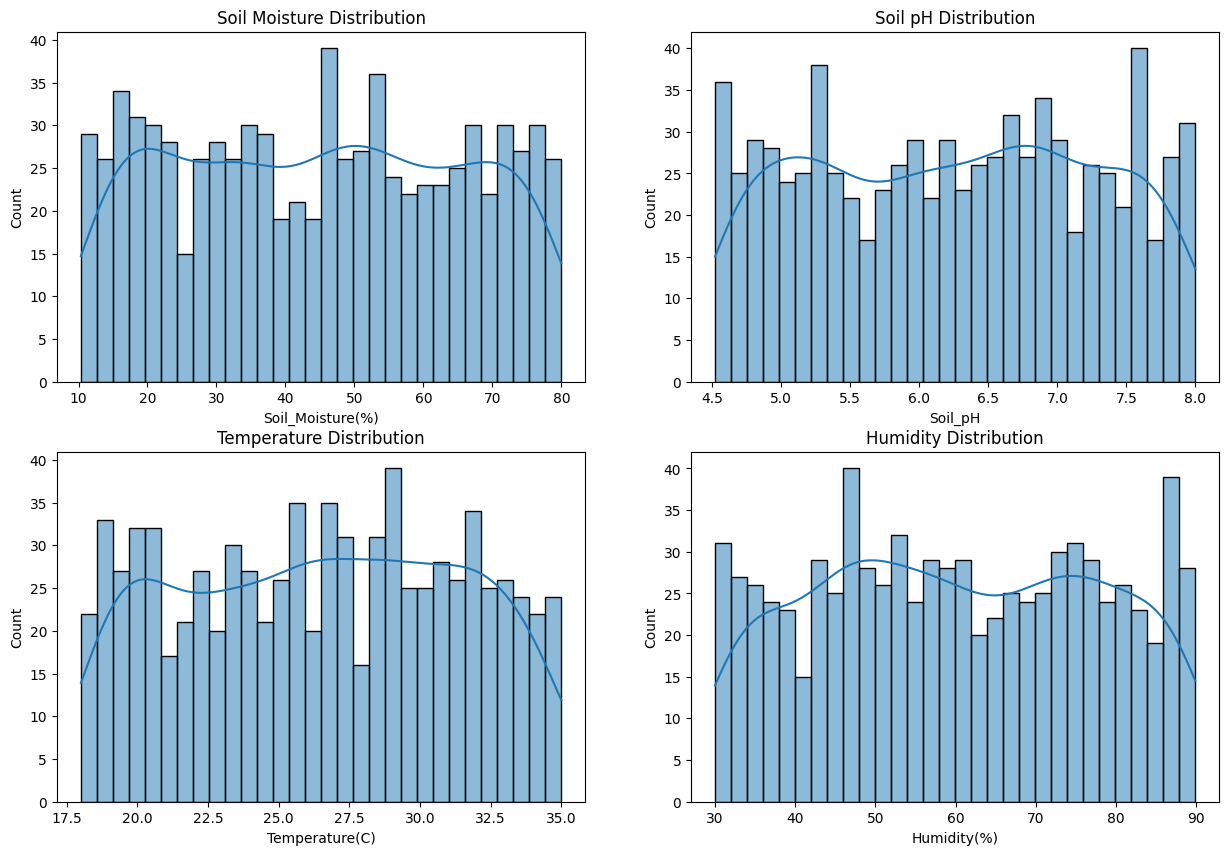

In [ ]:
# Distribution of numeric variables using histograms 
plt.figure(figsize = (15, 10))

# Histogram of Soil Moisture
plt.subplot(2, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins = 30, kde = True)
plt.title('Soil Moisture Distribution')

# Histogram of Soil pH
plt.subplot(2, 2, 2)
sns.histplot(df['Soil_pH'], bins = 30, kde = True)
plt.title('Soil pH Distribution')

# Histogram of Temperature 
plt.subplot(2, 2, 3)
sns.histplot(df['Temperature(C)'], bins = 30, kde = True)
plt.title('Temperature Distribution')

# Histogram of Humidity
plt.subplot(2, 2, 4)
sns.histplot(df['Humidity(%)'], bins = 30, kde = True)
plt.title('Humidity Distribution')


plt.show()


Text(0.5, 1.0, 'Irrigation Recommended Distribution')

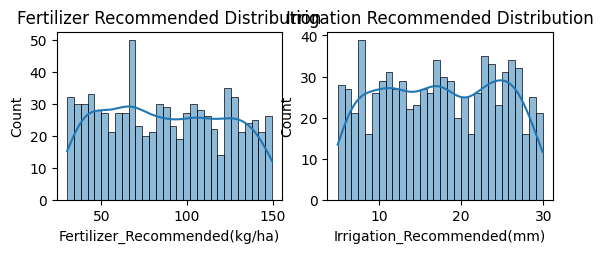

In [38]:
# Histogram of Fertilizer Recommended
plt.subplot(2, 2, 1)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins = 30, kde = True)
plt.title('Fertilizer Recommended Distribution')

# Histogram of Irrigation Recommended
plt.subplot(2, 2, 2)
sns.histplot(df['Irrigation_Recommended(mm)'], bins = 30, kde = True)
plt.title('Irrigation Recommended Distribution')


Text(0.5, 1.0, 'Correlation Heatmap')

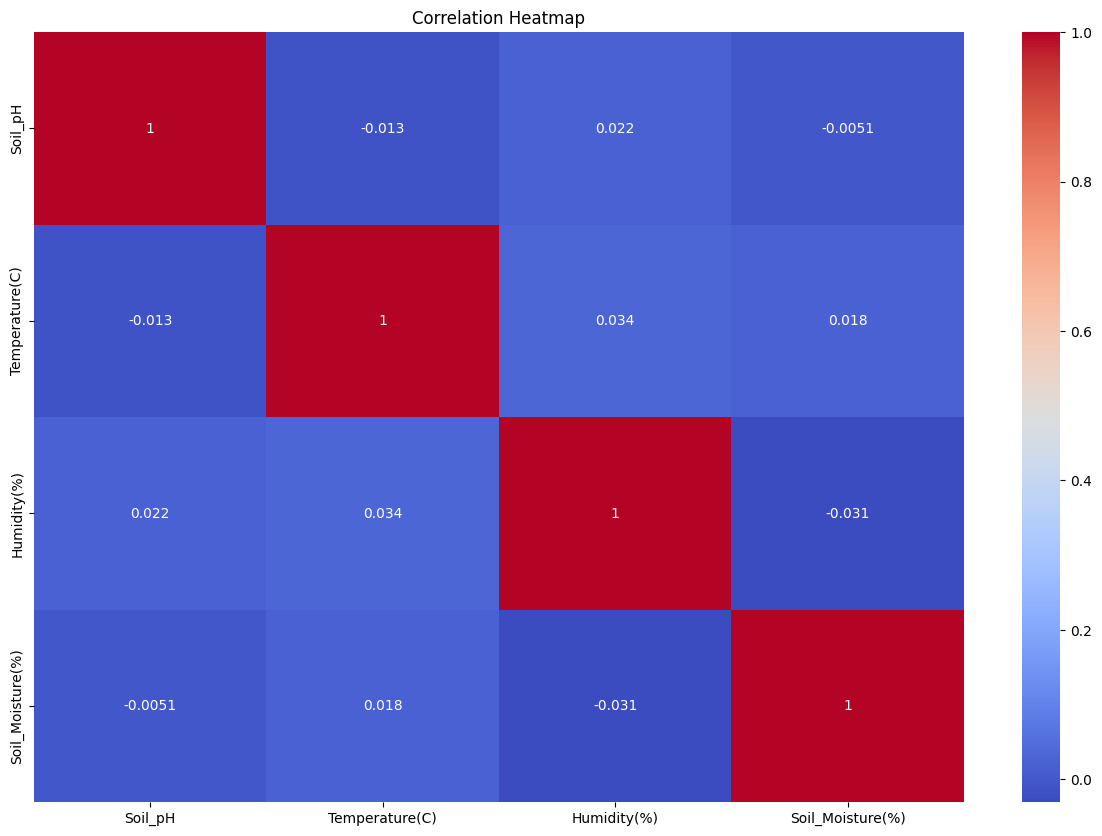

In [47]:
# Correlation heatmap to examine the relationships between soil and environmental variables
corr_matrix = df[['Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Soil_Moisture(%)']].corr()

# Plotting the correlation heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')



In [67]:
# Identifying which variables most influence fertilizer recommendations using correlation strength
# Compute correlation between Fertilizer_Recommended and each variable
fertilizer_corr = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)']].corr()
fertilizer_corr = fertilizer_corr['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)')

# Sort by absolute value
fertilizer_corr = fertilizer_corr.abs().sort_values(ascending=False)

print(fertilizer_corr)
print(f'The variable with the highest correlation with Fertilizer_Recommended is {fertilizer_corr.idxmax()}')




Soil_pH             0.083905
Humidity(%)         0.015042
Temperature(C)      0.008020
Soil_Moisture(%)    0.003542
Name: Fertilizer_Recommended(kg/ha), dtype: float64
The variable with the highest correlation with Fertilizer_Recommended is Soil_pH


In [66]:
# Identifying crop type with the highest average soil moisture percentage
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
print(avg_soil_moisture.sort_values(ascending = False))
print(f'The crop type with the highest average soil moisture percentage is {avg_soil_moisture.idxmax()}')



Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.394375
Tomatoes    43.985419
Lettuce     42.984868
Name: Soil_Moisture(%), dtype: float64
The crop type with the highest average soil moisture percentage is Wheat


In [ ]:
# Identifying appropriate irrigation adjustments for crops experiencing average temperatures above 30°C
# Identify crops with average temperatures above 30°C



In [ ]:
# Exporting the clean dataset 
df.to_csv('cleaned_precision_agriculture_data.csv', index = False)